In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

Total Instances on each iris species class
Iris-setosa        40
Iris-versicolor    40
Name: species, dtype: int64


     Bivariate Pairwise relationships between features of train data


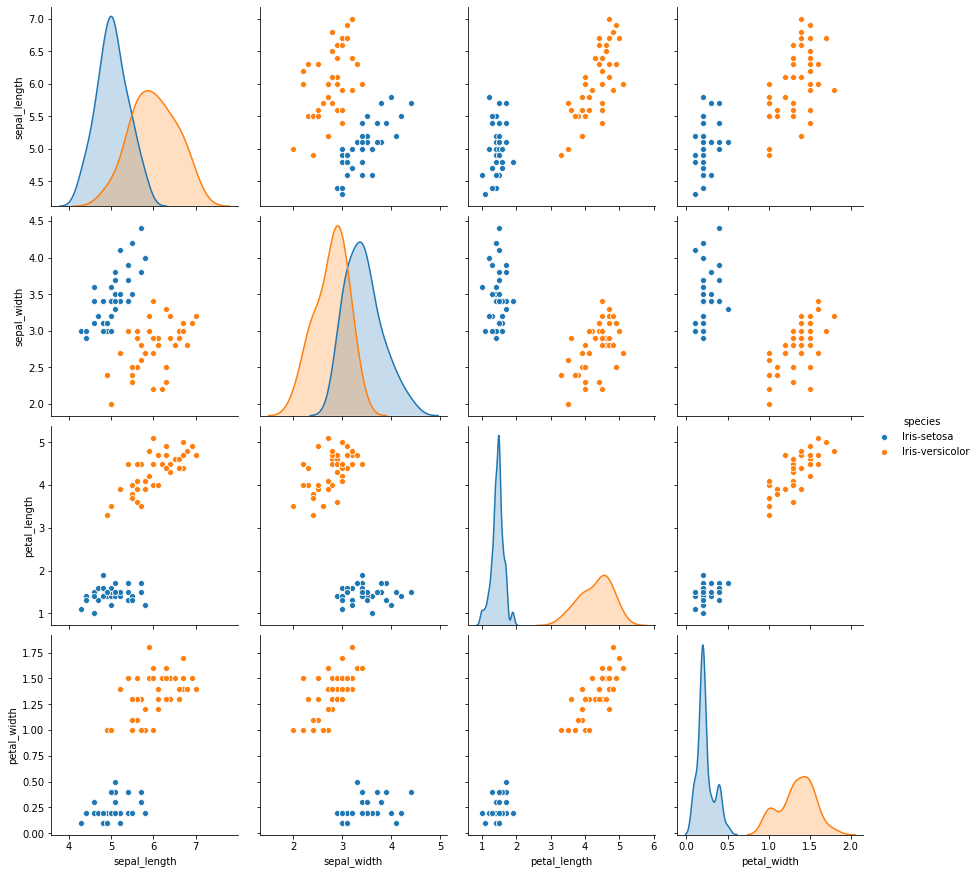

In [33]:
##Training data
data=pd.read_csv("IRIS_TrainData.csv",header=0)
print("Total Instances on each iris species class")
print (data["species"].value_counts())
print("\n\n     Bivariate Pairwise relationships between features of train data")
sns.pairplot(data, hue="species", height=3, diag_kind="kde")
plt.show(sns)

In [34]:
x_train=[]
y_train=[]
for i in range(0,len(data)):
    x_train.append([data.values[i,0],data.values[i,1],data.values[i,2],data.values[i,3]])
    if data.values[i,4]=='Iris-setosa':
        y_train.append([0.0001])
    else:
        y_train.append([0.9999])

In [35]:
#Normalising the inputs
sc = StandardScaler()
sc.fit(x_train)
xtrain=sc.transform(x_train)









   Input values before and after Scaling


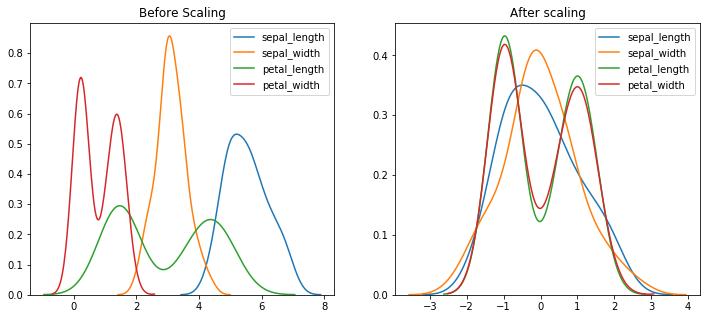

In [36]:
#Plot to visualise the input values before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After scaling')
print("\n\n\n\n\n\n\n\n   Input values before and after Scaling")
label_names=['sepal_length','sepal_width','petal_length','petal_width']
for i in range(0,4):
    t1=[]
    t2=[]
    for row1 in x_train:
        t1.append(row1[i])
    for row2 in xtrain:
        t2.append(row2[i])
    sns.kdeplot(t1,ax=ax1,label=label_names[i])
    sns.kdeplot(t2,ax=ax2,label=label_names[i])
plt.show()

In [37]:
class NeuralNet:
    def __init__(self,x,y,lr,epoch):
        np.random.seed(100)
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],6) 
        self.weights2   = np.random.rand(6,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.lr         = lr
        self.epoch      = epoch
        self.costlist   = []
        
    @staticmethod    
    def _sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))
    
    @staticmethod    
    def _sigmoid_derivative(x): return x * (1 - x)      
    
    @staticmethod
    def cost(y_target,y_output):
        return 0.5*np.sum(np.square(np.subtract(y_target,y_output)))
    
    def feedforward(self):
        self.layer1 = self._sigmoid(np.dot(self.input, self.weights1))
        self.output = self._sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the cost function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, ((self.y - self.output) * self._sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot((self.y - self.output) * self._sigmoid_derivative(self.output), self.weights2.T) * self._sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the cost function
        self.weights1 += d_weights1 * self.lr
        self.weights2 += d_weights2 * self.lr     
        
    def train(self):
        for i in range (self.epoch):
            self.feedforward()
            self.backprop()
            self.costlist.append(self.cost(self.y,self.output))
            
    def predict(self,input_data):
        self.input=input_data
        self.feedforward()
        return self.output

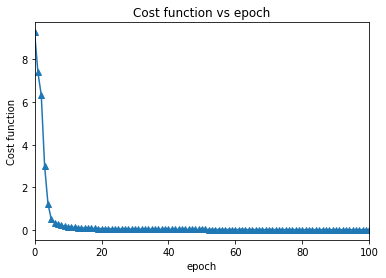

In [38]:
if __name__ == "__main__":
    nn = NeuralNet(x=xtrain,y=np.array(y_train),lr=0.3,epoch=2000)
    nn.train()
    
    
    ##Plotting the cost vs epoch
    ep=[]
    for i in range (0,len(nn.costlist)):
        ep.append(i)
    plt.plot(ep,nn.costlist,marker = '^')
    plt.xlabel('epoch')
    plt.ylabel('Cost function')
    plt.title("Cost function vs epoch")
    plt.xlim((0,100))
    plt.show()

In [40]:
  ##Normalising the inputs of test data
    
x_test=[[4.4,3.2,1.3,0.2],[5.0,3.5,1.6,0.6],[5.6,2.7,4.2,1.3],[5.7,3.0,4.2,1.2]]
xtest=sc.transform(x_test)
out=nn.predict(xtest)

In [41]:
    ##Labeling the test data based on the output of the Neuralnet
    species=[]
    print("\n\n  Output obtained from NeuralNetwork for Test data")
    print("\nsepal_length  sepal_width  petal_length  petal_width  Neuralnet_output  Species")
    for i in range(0,len(xtest)):
        if(out[i]<0.5):
            species.append('Iris-setosa')
        else:
            species.append('Iris-versicolor')
        print("       ",x_test[i][0],"        ",x_test[i][1],"         ",x_test[i][2],"        ",x_test[i][3],"    ",out[i]," ",species[i])



  Output obtained from NeuralNetwork for Test data

sepal_length  sepal_width  petal_length  petal_width  Neuralnet_output  Species
        4.4          3.2           1.3          0.2      [0.00281349]   Iris-setosa
        5.0          3.5           1.6          0.6      [0.00430582]   Iris-setosa
        5.6          2.7           4.2          1.3      [0.99775325]   Iris-versicolor
        5.7          3.0           4.2          1.2      [0.99613366]   Iris-versicolor


In [19]:
 @staticmethod
def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1

In [20]:
if __name__=='__main__':
    import matplotlib.pyplot as plt
    nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
    y = np.sin(X)
    
    nn.train(X, y, epochs=10000, batch_size=64, lr = .1)
    _, a_s = nn.feedforward(X)
    #print(y, X)
    plt.scatter(X.flatten(), y.flatten())
    plt.scatter(X.flatten(), a_s[-1].flatten())
    plt.show()

AttributeError: 'NeuralNetwork' object has no attribute 'train'